In [69]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt #to increase the heatmap size
import matplotlib
%matplotlib inline

In [40]:
#loading the dataset
df = pd.read_csv(r"C:\Users\disha\Downloads\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
#PREPROCESSING THE DATASET
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
#fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [45]:
#fill the missing values for categorical terms - mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [46]:
#nows null values are removed
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

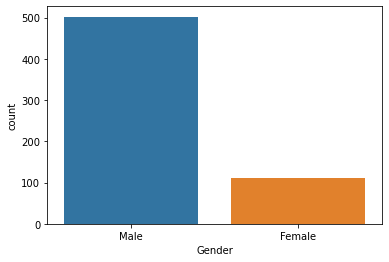

In [47]:
#EXPLORATORY DATA ANALYSIS (EDA)
#categorical attributes visualization
sns.countplot(df['Gender'])

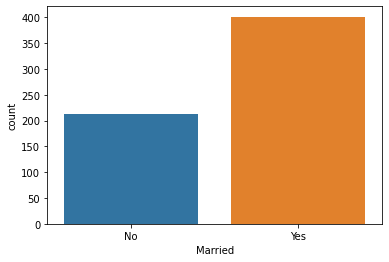

In [48]:
sns.countplot(df['Married'])

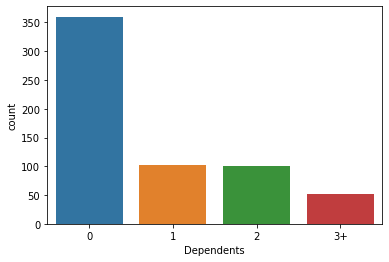

In [49]:
sns.countplot(df['Dependents'])

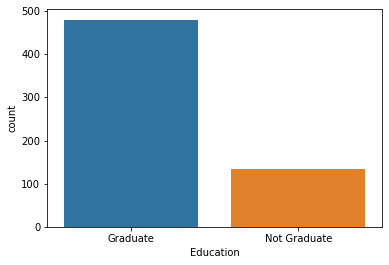

In [50]:
sns.countplot(df['Education'])

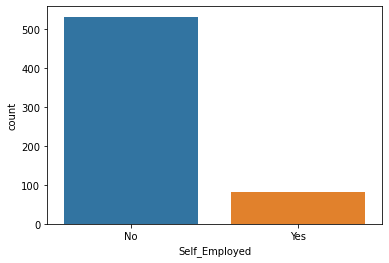

In [51]:
sns.countplot(df['Self_Employed'])

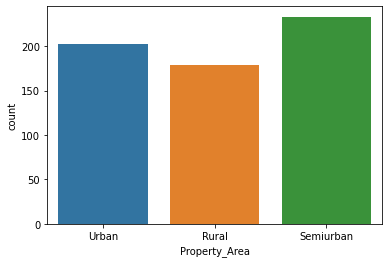

In [52]:
sns.countplot(df['Property_Area'])

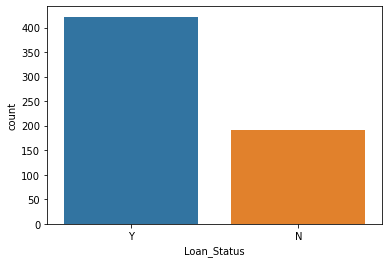

In [53]:
sns.countplot(df['Loan_Status'])

In [54]:
#CREATION OF NEW ATTRIBUTES
#total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


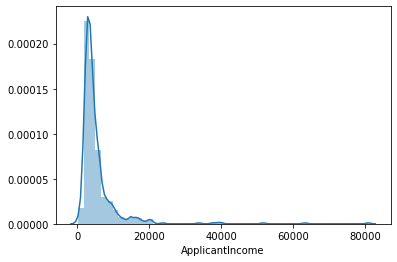

In [55]:
#numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

In [56]:
#apply log transformation to the attribute to normalize the bend
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)

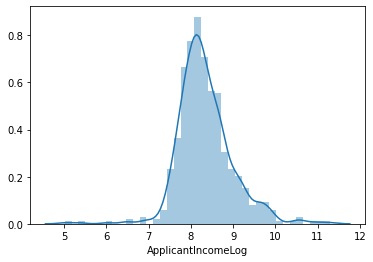

In [57]:
sns.distplot(df["ApplicantIncomeLog"]) #now mean is in centre instead of less skewed, this is a good distribution to train the model
#common techniques will be min max normalization or standardization

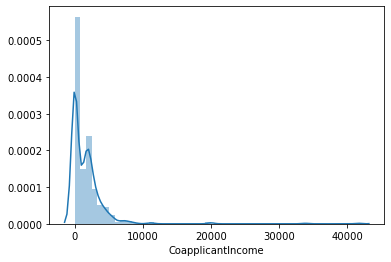

In [58]:
sns.distplot(df['CoapplicantIncome']) #again left skewed so normalize

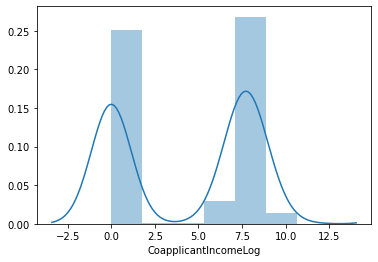

In [61]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomeLog'])

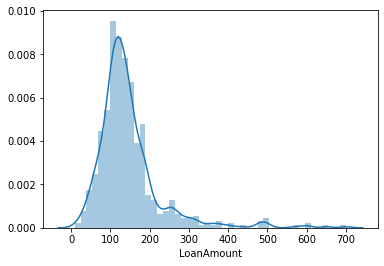

In [62]:
sns.distplot(df['LoanAmount'])

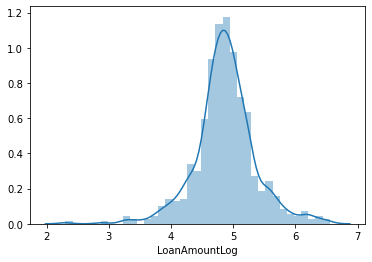

In [63]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountLog'])

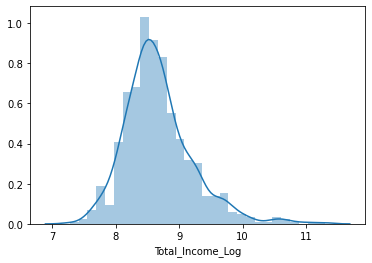

In [64]:
df['Total_Income_Log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_Log'])

C:\Users\disha\pyth\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


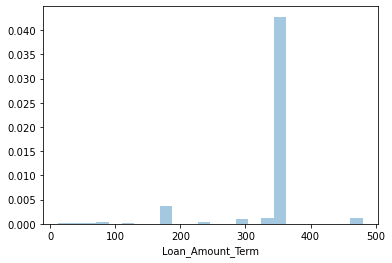

In [65]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\disha\pyth\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


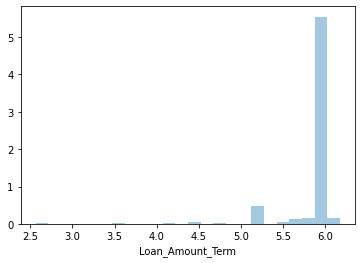

In [66]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term'])

C:\Users\disha\pyth\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


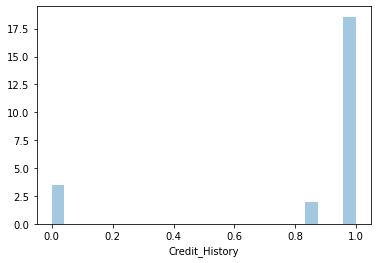

In [67]:
sns.distplot(df['Credit_History']) #no normalization needed

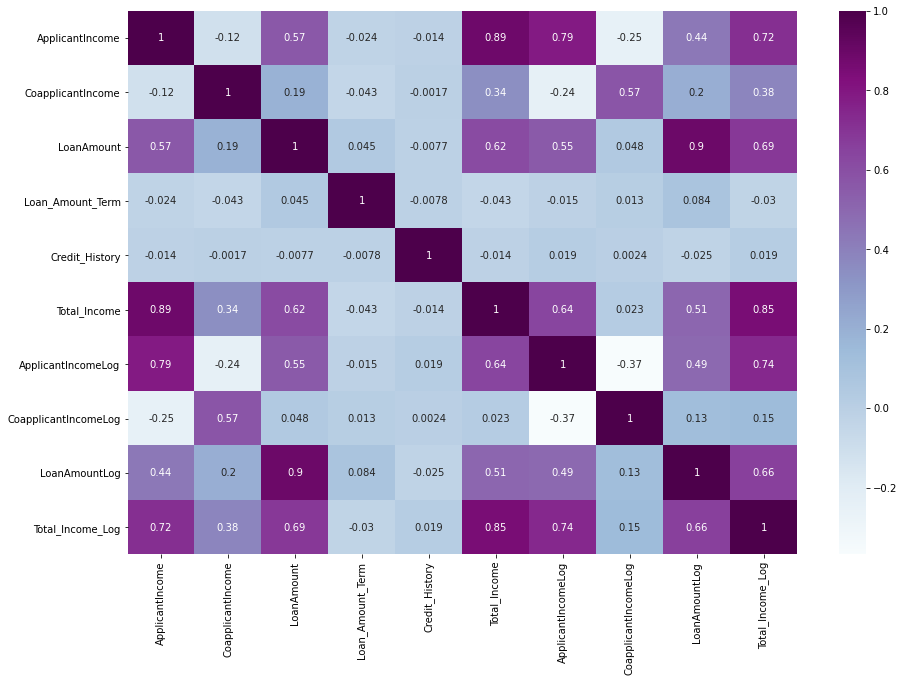

In [73]:
#CORRELATION MATRIX
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap='BuPu')

In [75]:
#drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','CoapplicantIncomeLog','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID'] 
df = df.drop(columns=cols, axis=1) #1 means column dropping and 0 means row dropping

In [76]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,8.699681


In [83]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [84]:
df.head() #categorical into numerical data note: loan status: Y=1, N=0

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,8.699681


In [85]:
#TRAIN-TEST SPLIT
#specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [87]:
#MODEL TRAINING
#defining a small function to reuse the code
#classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is",model.score(x_test, y_test)*100)
    #cross validation - it is used for better validation of model
    #eg: if cv-5, we will split the data into 5 parts for train-4 and test-1
    score = cross_val_score(model, x, y, cv=5)
    print("cross validation is ",np.mean(score)*100)

In [88]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy is 77.27272727272727
cross validation is  81.10888977742236


In [89]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy is 70.77922077922078
cross validation is  71.66600026656005


In [94]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy is 77.27272727272727
cross validation is  78.34466213514595


In [96]:
#Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,x,y)

Accuracy is 74.67532467532467
cross validation is  77.52898840463814


In [100]:
#HYPERPARAMETER TUNING
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model,x,y)

Accuracy is 77.27272727272727
cross validation is  80.78501932560309


In [101]:
#Confusion Matrix - it is a summary of prediction results on a classification proble. The no. of correct
#and incorrect predictions are summarized with count values and broken down by each class.
#we can use this to reduce the error
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 6, 94]], dtype=int64)

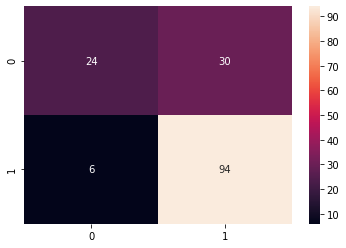

In [105]:
sns.heatmap(cm, annot=True) #left diagonal counts that are predicted correctly and right diagonal not predicyed correctly